# Classification Modeling

In [141]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

## Load Data

In [142]:
df = pd.read_csv('data/train.csv')

X = df.drop('label', axis=1)
y = df.label

df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Preprocessing
Create greyscale and binary image representations and split into training and testing sets


In [143]:
# Create a dataset with grayscale image data and another with binary (black and white) image data

X_greyscale = X
#y_greyscale = y

convert_binary = lambda x: 1 if x > 0 else 0
X_binary = X.applymap(convert_binary)
#y_binary = y.apply(convert_binary)

X_gs_train, X_gs_test, y_gs_train, y_gs_test = train_test_split(X_greyscale, y, test_size=.25, random_state=1)
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y, test_size=.25, random_state=1)

In [144]:
X_greyscale.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


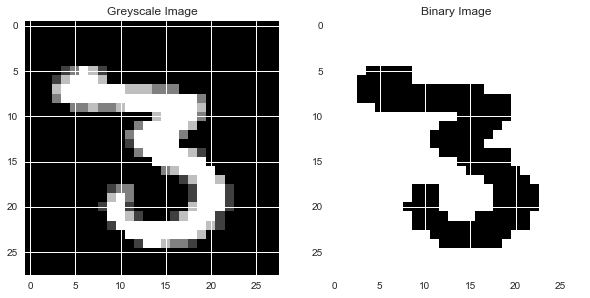

In [145]:
# Plot visualiztion of the different representations

plt.figure(figsize=(10, 6))

plt.figure(1)

plt.subplot(121)
image_greyscale = X_greyscale.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_greyscale, cmap='gray')
plt.title('Greyscale Image')

plt.subplot(122)
image_binary = X_binary.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_binary, cmap='binary')
plt.title('Binary Image')

## Baseline Models
Train and validate baseline models suing subset of training data 

In [57]:
# Use some basic models

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Use some ensemble methods, for this useit's okay if our model is a black box

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

baseline_models = [SVC, GaussianNB, DecisionTreeClassifier, 
                   RandomForestClassifier, AdaBoostClassifier]
baseline_models_str = ['SVC', 'GaussianNB', 'Decision Tree', 
                   'Random Forest', 'Ada Boost']
baseline_scores_greyscale = []
baseline_scores_binary = []

for m in baseline_models:
    baseline_scores_greyscale.append(np.mean(cross_val_score(m(), X_gs_train[:5000], y_gs_train[:5000])))
    
for m in baseline_models:
    baseline_scores_binary.append(np.mean(cross_val_score(m(), X_binary_train[:5000], y_binary_train[:5000])))

In [58]:
baseline_df = pd.DataFrame()
baseline_df['model'] = pd.Series(baseline_models_str*2)
baseline_df['score'] = pd.Series(baseline_scores_greyscale + baseline_scores_binary)
baseline_df['kind'] = pd.Series(['Greyscale']*len(baseline_models) + ['Binary']*len(baseline_models))

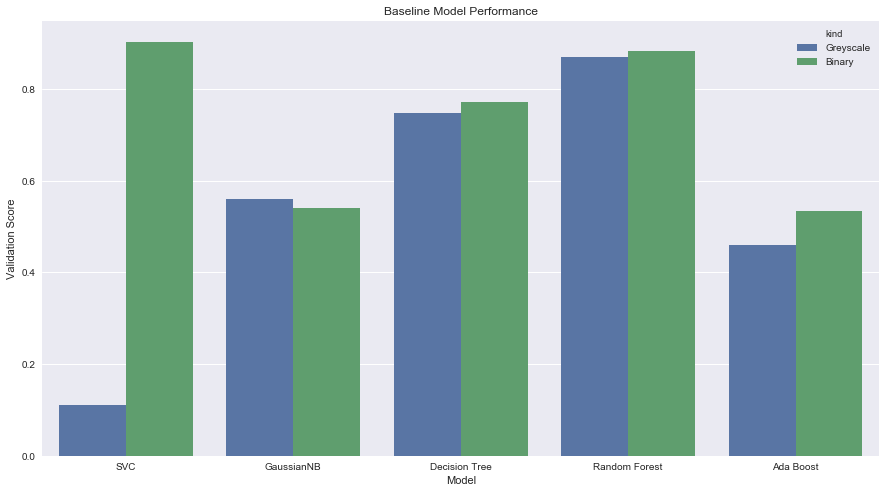

In [59]:
plt.figure(figsize=(15, 8))

ax = sns.barplot(x='model', y='score', hue='kind', data = baseline_df)
ax.set(title='Baseline Model Performance', xlabel='Model', ylabel="Validation Score")

In [60]:
models = baseline_df.model.tolist()
scores = baseline_df.score.tolist()
kinds = baseline_df.kind.tolist()
for model, kind, score in zip(models, kinds, scores):
    print(model, '(', kind, '):', score)

SVC ( Greyscale ): 0.11179991856772296
GaussianNB ( Greyscale ): 0.5606045297919721
Decision Tree ( Greyscale ): 0.7478110382019129
Random Forest ( Greyscale ): 0.8693877084745667
Ada Boost ( Greyscale ): 0.46067147401425085
SVC ( Binary ): 0.9034015407900772
GaussianNB ( Binary ): 0.5402006027435652
Decision Tree ( Binary ): 0.7714114649344244
Random Forest ( Binary ): 0.8837920529471551
Ada Boost ( Binary ): 0.5330723721338785


Validation scores are generally higher when using the binary representation of the images as opposed to the greyscale representation. The only model that scores lower is the Naive Bayes model, which makes sense since it's the only generative one in this set and greyscale values allow it to better emulate the natural distribution of a given digit.

## Model Tuning
Tune hyperparameters of best models (SVC and Random Forest) using simple cross-validation and then a full grid search

### SVM

In [64]:
# Build linear SVC
svc_linear = SVC(kernel='linear')

# Perform cross-validation to find optimal C value
scores_linear = []
params_linear = np.logspace(-6, 6, 20)
for i in params_linear:
    svc_linear.C = i
    scores = cross_val_score(svc_linear, X_binary_train[:1000], y_binary_train[:1000], cv=5)
    scores_linear.append(1 - np.mean(scores))

index_linear = scores_linear.index(min(scores_linear))
C_linear = params_linear[index_linear]

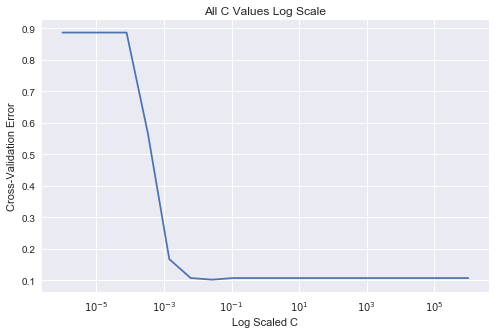

Optimal C:  0.0263665089873


In [65]:
# Plot cross-validation error

plt.figure(figsize=(8, 5))

plt.plot(params_linear, scores_linear)
plt.xlabel('Log Scaled C')
plt.ylabel('Cross-Validation Error')
plt.title('All C Values Log Scale')
plt.xscale('log')
plt.show()
print('Optimal C: ', C_linear)

In [66]:
svc_tuned = SVC(kernel='linear', C=C_linear)
svc_tuned.fit(X_binary_train, y_binary_train)
svc_predict = svc_tuned.predict(X_binary_test)
svc_accuracy = accuracy_score(y_binary_test, svc_predict)
print('Tuned SVM Accuracy: ', svc_accuracy)

Tuned SVM Accuracy:  0.938


99.2% is a decent improvement from our untuned SVM model, but it still doesn't surpass the performance of other simple models. Let's do a full grid search cross-validation, checking different kernels, to see if we can get an even higher score.

In [67]:
parameter_candidates = [
  {'C': [.001, .01, 1, 10, 100], 'kernel': ['linear']},
  {'C': [.001, .01, 1, 10, 100], 'gamma': [.01, .001, 0.0001], 'kernel': ['rbf']},
  {'C': [.001, .01, 1, 10, 100], 'degree': [1, 2, 3, 4], 'kernel': ['poly']}
]

clf_svm = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

clf_svm.fit(X_binary_train[:5000], y_binary_train[:5000]);   

In [68]:
print('SVM accuracy with GridSearchCV: ',clf_svm.best_score_)
clf_svm.best_estimator_

SVM accuracy with GridSearchCV:  0.9522


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The grid search found that a Gaussian SVM best fits the data and produced a tuned model with a validation score of 95.22%. Decent result for a simple tuned model.

### Random Forest

In [69]:
# Build new random forest classifier
rf = RandomForestClassifier()

# Perfrom cross-validation to find optimal maximum depth parameter
scores_max_depth = []
params_max_depth = np.logspace(1, 8, 20)
for x in params_max_depth:
    rf.max_depth = x
    scores = cross_val_score(rf, X_binary_train[:1000], y_binary_train[:1000], cv=10)
    scores_max_depth.append(1 - np.mean(scores))

index_max_depth = scores_max_depth.index(min(scores_max_depth))
optimal_max_depth = params_max_depth[index_max_depth]

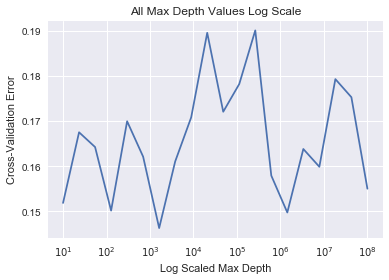

Optimal Max Depth:  1623.77673919


In [70]:
plt.plot(params_max_depth, scores_max_depth)
plt.xlabel('Log Scaled Max Depth')
plt.ylabel('Cross-Validation Error')
plt.title('All Max Depth Values Log Scale')
plt.xscale('log')
plt.show()
print('Optimal Max Depth: ', optimal_max_depth)

In [71]:
rf_tuned = RandomForestClassifier()
rf_tuned.fit(X_binary_train, y_binary_train)
rf_predict = rf_tuned.predict(X_binary_test)
rf_accuracy = accuracy_score(y_binary_test, svc_predict)
print('Tuned Random Forest Accuracy: ', rf_accuracy)

Tuned Random Forest Accuracy:  0.938


In [72]:
parameter_candidates = [
  {'n_estimators': [10, 100, 500, 1000, 5000, 10000], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 3, 4],
  'criterion': ['gini', 'entropy']},
]

clf_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter_candidates, n_jobs=-1)

clf_rf.fit(X_binary_train[:5000], y_binary_train[:5000]);   

In [73]:
print('Random Forest score with GridSearchCV: ',clf_rf.best_score_)
clf_rf.best_estimator_

Random Forest score with GridSearchCV:  0.9396


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

We're getting a decent boost in performance when we try to tune our random forest classifier, but there's no significant difference between only tuning one hyperparameter and tuning four. This makes sense since it's an ensemble method and acts more like a "black box" that we can't interact with too easily. 

After tuning a Gaussian SVM has show to have the best validation performace. Let's test its accuracy by training it on our full training set and testing it against our full testing set.

In [74]:
svm = clf_svm.best_estimator_
svm.fit(X_binary_train, y_binary_train)
prediction_svm = svm.predict(X_binary_test)
accuracy_svm = accuracy_score(y_binary_test, prediction_svm)
print(accuracy_svm)

0.97780952381


Our tuned Support Vector Classifier has an accuracy of 97.78%. This is great for a relativley simple discriminative model. But I think we can do better here. I'm going to try using deep learning achieve a higher level of accuracy.

## Deep Learning

In [146]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

### Simple Neural Network
Simple model with one hidden layer

In [159]:
# Convert data to NumPy matrix form (only use black and white representation, leave out greyscale)
X_train = X_binary_train.as_matrix()
X_test = X_binary_test.as_matrix()

# Convert target data categories to binary representation (one-hot encode)
y_encoded_train = np_utils.to_categorical(y_binary_train)
y_encoded_test = np_utils.to_categorical(y_binary_test)

# Convert predictor data to work with CNN
X_cnn_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_cnn_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [164]:
# Build basic model
basic_model = Sequential()
basic_model.add(Dense(784, input_dim=784, init='normal', activation='relu'))
basic_model.add(Dense(10, init='normal', activation='softmax'))

# Compile basic model
basic_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`


In [165]:
# Train basic model
basic_model.fit(X_train, y_encoded_train, nb_epoch=15, batch_size=200, verbose=2)

C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/15
5s - loss: 0.3828 - acc: 0.8857
Epoch 2/15
5s - loss: 0.1625 - acc: 0.9523
Epoch 3/15
4s - loss: 0.1109 - acc: 0.9674
Epoch 4/15
5s - loss: 0.0806 - acc: 0.9765
Epoch 5/15
4s - loss: 0.0574 - acc: 0.9840
Epoch 6/15
4s - loss: 0.0458 - acc: 0.9871
Epoch 7/15
4s - loss: 0.0321 - acc: 0.9920
Epoch 8/15
4s - loss: 0.0227 - acc: 0.9956
Epoch 9/15
5s - loss: 0.0179 - acc: 0.9967
Epoch 10/15
5s - loss: 0.0138 - acc: 0.9979
Epoch 11/15
5s - loss: 0.0097 - acc: 0.9985
Epoch 12/15
5s - loss: 0.0076 - acc: 0.9994
Epoch 13/15
5s - loss: 0.0055 - acc: 0.9997
Epoch 14/15
5s - loss: 0.0039 - acc: 1.0000
Epoch 15/15
6s - loss: 0.0030 - acc: 1.0000


In [166]:
# Test basic model
accuracy_basic_model = basic_model.evaluate(X_test, y_encoded_test, verbose=0)
print('Basic model accuracy: ', accuracy_basic_model[1])

Basic model accuracy:  0.975238095238


The performance of this simple neural network is slightly worse than the SVM model. Let's try using a convolutional neural network.

### Convolutional Neural Network

In [171]:
from keras import backend as K
K.set_image_dim_ordering('th')

# Build simple CNN
simple_cnn = Sequential()
simple_cnn.add(Convolution2D(64, 5, 5, border_mode='same', input_shape=(1, 28, 28), activation='relu'))
simple_cnn.add(MaxPooling2D(pool_size=(2, 2)))
simple_cnn.add(Dropout(0.2))
simple_cnn.add(Flatten())
simple_cnn.add(Dense(128, activation='relu'))
simple_cnn.add(Dense(10, activation='softmax'))

# Compile simple CNN
simple_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(1, 28, 28..., activation="relu", padding="same")`


In [172]:
# Train simple CNN
simple_cnn.fit(X_cnn_train, y_encoded_train, validation_data=(X_cnn_test, y_encoded_test), nb_epoch=10, batch_size=200, verbose=2)

C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 31500 samples, validate on 10500 samples
Epoch 1/10
152s - loss: 0.3116 - acc: 0.9084 - val_loss: 0.1132 - val_acc: 0.9662
Epoch 2/10
145s - loss: 0.0969 - acc: 0.9700 - val_loss: 0.0941 - val_acc: 0.9704
Epoch 3/10
148s - loss: 0.0660 - acc: 0.9800 - val_loss: 0.0734 - val_acc: 0.9763
Epoch 4/10
146s - loss: 0.0506 - acc: 0.9838 - val_loss: 0.0687 - val_acc: 0.9791
Epoch 5/10
148s - loss: 0.0395 - acc: 0.9868 - val_loss: 0.0634 - val_acc: 0.9808
Epoch 6/10
146s - loss: 0.0312 - acc: 0.9903 - val_loss: 0.0634 - val_acc: 0.9822
Epoch 7/10
147s - loss: 0.0274 - acc: 0.9911 - val_loss: 0.0632 - val_acc: 0.9814
Epoch 8/10
154s - loss: 0.0218 - acc: 0.9937 - val_loss: 0.0649 - val_acc: 0.9815
Epoch 9/10
148s - loss: 0.0160 - acc: 0.9950 - val_loss: 0.0635 - val_acc: 0.9821
Epoch 10/10
162s - loss: 0.0133 - acc: 0.9960 - val_loss: 0.0646 - val_acc: 0.9830


In [174]:
# Test simple cnn
accuracy_simple_cnn = basic_cnn.evaluate(X_cnn_test, y_encoded_test, verbose=0)
print('Simple CNN accuracy: ', accuracy_simple_cnn[1])

Simple CNN accuracy:  0.983904761905
